## Esemble Learning and its type
#### 1 . Bagging 
#### 2 . Boosting

##### Esemble Learning Technique (Max Voting & Averaging & Weighted Average Voting)

###### 1. Max Voting (Use for Classification data)
###### 2. Average Voting & Weighted Average Voting(Use for Regression)

### 1. Voting Classifier (Use for Classification data)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import pandas as pd


In [15]:
x,y=make_moons(n_samples=1000, noise=0.2, random_state=42)

In [16]:
dataset = pd.DataFrame({'Feature1': x[:, 0], 'Feature2': x[:, 1], 'Target': y})

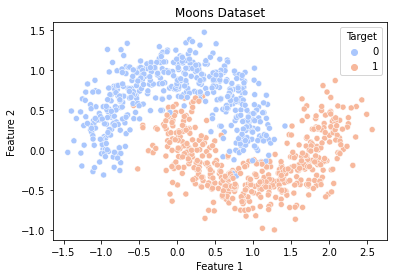

In [17]:
sns.scatterplot(x='Feature1', y='Feature2',data=dataset, hue='Target', palette='coolwarm')
plt.title('Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Target')
plt.show()

In [22]:
x_a = dataset.drop(['Target'], axis=1)
y_a = dataset['Target']


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size=0.2, random_state=42)

#### Fit 3 Models and check accurancy

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, 97.0)

In [31]:
from sklearn.svm import SVC
svc =SVC()
svc.fit(x_train, y_train)
svc.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(96.875, 97.0)

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb =GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(86.75, 97.0)

#### Max Voting Classifier

In [35]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('dt', dt), ('svc', svc), ('gnb', gnb)],weights=[2, 1, 1], voting='hard')
voting_clf.fit(x_train, y_train)


VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('svc', SVC()),
                             ('gnb', GaussianNB())],
                 weights=[2, 1, 1])

In [36]:
voting_clf.score(x_train, y_train) * 100, voting_clf.score(x_test, y_test) * 100

(98.625, 96.0)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = voting_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

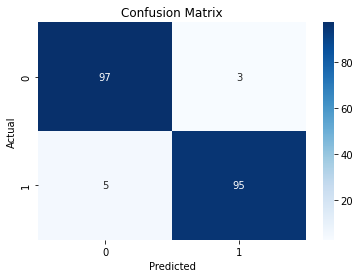

In [43]:
# plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Compaire all models answer

In [47]:
models_output_datafram=pd.DataFrame({'dt': dt.predict(x_test),'svc': svc.predict(x_test), 'gnb': gnb.predict(x_test), 'voting': voting_clf.predict(x_test)}
)

In [48]:
models_output_datafram.head()

,dt,svc,gnb,voting
0,1,1,1,1
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,1,1,1,1


c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Muhammad Uzair\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


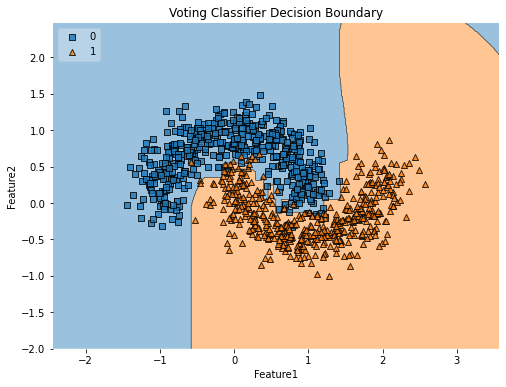

In [53]:
from mlxtend.plotting import plot_decision_regions

# Plot decision boundary for Voting Classifier
plt.figure(figsize=(8,6))
plot_decision_regions(x_a.values, y_a.values, clf=voting_clf, legend=2)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Voting Classifier Decision Boundary')
plt.show()


### 2. Average Voting & Weighted Average Voting(Use for Regression)

In [54]:
dataset =pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\placement.csv')
dataset.head(5)

,Unnamed: 0,cgpa,score,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [58]:
dataset.drop(['Unnamed: 0'],axis=1)

,cgpa,score,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


In [59]:
x =dataset.iloc[:,:-1]
y =dataset['placement']

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [76]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train) * 100, lr.score(x_test, y_test) * 100

(69.35274244298577, 61.41224080432708)

In [77]:
dr = DecisionTreeRegressor()
dr.fit(x_train, y_train)
dr.score(x_train, y_train) * 100, lr.score(x_test, y_test) * 100

(100.0, 61.41224080432708)

In [78]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf.score(x_train, y_train) * 100, rf.score(x_test, y_test) * 100

(96.708, 63.786)

# Use Voting Regressor

In [86]:
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor(estimators=[('lr', lr), ('dr', dr), ('rf', rf)])
voting_regressor.fit(x_train, y_train)
voting_regressor.score(x_train, y_train) * 100, voting_regressor.score(x_test, y_test) * 100

(95.00432924380038, 66.89645526529743)